#### The historical stock price movement for 39 companies. This stock price movement is defined as the difference in dollar amount between the closing and opening prices for each trading day. The data was originally collected from Yahoo Finance for 2010 to 2015 duration. Each column represents a trading day and each row represents a company. Refer to the header and index for details about the trading day and companies.

Apply any of the clustering methods to partition companies into clusters. What insights can you gather from these clusters? 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
companies= pd.read_csv("../input/company-stocks/company_stocks.csv")

In [3]:
companies.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
1,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
2,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
3,Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
4,Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001


In [4]:
stock_diff=companies.iloc[:,1:964]
#stock_diff=companies.loc[:,companies.columns != 'Company']
Company_Name=companies.iloc[:,0]

#### Curse of Dimensionality
When data does not have enough features, the model is likely to underfit, and when data has too many features, it is likely to overfit. Hence it is called the curse of dimensionality. 

**Principal Component Analysis (PCA)** Defined as the transformation of any high number of variables into a smaller number of uncorrelated variables called principal components (PCs), developed to capture as much of the data’s variance as possible.

### Scaling our Data by the help of Standard Scaler

In [5]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()

In [6]:
scale_fit_transform = StandardScaler().fit_transform(stock_diff)
pd.DataFrame(scale_fit_transform)[:5]

,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
0,-2.528000,-1.624150,-0.753976,-0.952977,1.126997,-0.356745,-2.436019,-0.483253,-0.846481,-0.450566,...,1.073350,0.105677,0.188302,-0.500040,-0.264873,-0.427354,-0.575366,-0.404594,-1.312918,1.303694
1,-0.477424,-0.343123,0.383507,0.908595,-0.107762,-0.465077,1.451007,0.337742,1.314564,0.668476,...,0.584019,2.619942,1.083125,0.117384,-0.105533,0.105130,0.159606,2.920117,-0.378073,0.935484
2,0.479518,3.145213,3.505506,4.125518,-0.416467,-1.718639,0.644656,1.230091,1.001789,-1.085697,...,2.378248,2.922293,-0.120267,-1.614415,0.567203,4.593258,-0.207880,3.078442,1.937785,0.229734
3,0.452180,0.563453,0.189889,0.141103,-1.033840,-0.140078,-0.843987,-0.054910,0.035000,-0.087630,...,-0.313102,-0.689973,-0.336252,0.207737,-0.335692,-0.366501,-0.024144,-0.140727,-0.590539,-1.059003
4,1.217729,0.386076,-0.487753,-0.544737,-0.487689,0.123016,-0.265069,-0.233387,0.603692,0.668476,...,-0.374271,-0.133014,0.034021,0.403503,-0.194057,-0.701207,0.458166,-0.527728,-0.271842,-1.059006


**Since the aim of PCA is data reduction, we need some criteria or we will have the same number of variables after a PCA.One rule of thumb is that a component should not be retained unless it has an eigenvalue greater than or equal to one (the ‘Kaiser’ criterion).**

**Finding Covariance & Eigen Values**

In [7]:
cov_mat = np.cov(scale_fit_transform)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [8]:
print('\nEigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)


Eigenvalues 
[6.88836695e+00 3.67298834e+00 2.86847779e+00 2.43585932e+00
 2.25198401e+00 1.87144975e+00 1.65854419e+00 1.49382283e+00
 1.34600594e+00 1.24034363e+00 1.21334144e+00 1.12529086e+00
 1.08026174e+00 9.87543662e-01 9.35483621e-01 8.86419269e-01
 8.47064370e-01 7.43073058e-01 6.82613203e-01 6.16732521e-01
 5.30501855e-01 5.12096251e-01 1.67977579e-15 3.85180348e-01
 3.55275948e-01 3.22953384e-01 2.96981546e-02 2.76511155e-01
 7.75627773e-02 9.68869783e-02 2.11554013e-01 1.95259365e-01
 1.24388516e-01 1.83883025e-01 1.37793854e-01 1.46765871e-01
 1.71106573e-01 1.61425463e-01 1.56867606e-01]
Eigenvectors 
[[-0.06196065  0.11006201  0.16271295 ...  0.00781671 -0.00889204
   0.00042524]
 [-0.10371451 -0.06784621  0.04463407 ... -0.00782604  0.01957685
   0.00456975]
 [-0.27708679 -0.37824178  0.37262282 ... -0.00602799 -0.00192667
  -0.01381751]
 ...
 [-0.14398536 -0.03143224 -0.21363461 ... -0.00702274  0.00492143
   0.01106938]
 [ 0.13082259  0.07288955  0.01657718 ... -0.06

**Explained Variance**

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import sklearn.cluster as cluster

In [10]:
pca = PCA()

In [11]:
X_r = pca.fit(scale_fit_transform).transform(scale_fit_transform)
print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_)


Eigenvalues 
[1.74397748e+02 9.47724421e+01 7.27575950e+01 6.18946725e+01
 5.70132186e+01 4.74161230e+01 4.21255113e+01 3.79785324e+01
 3.40757656e+01 3.14137639e+01 3.07168748e+01 2.85758344e+01
 2.73478001e+01 2.50156226e+01 2.37012483e+01 2.24523870e+01
 2.14543145e+01 1.88233836e+01 1.72972866e+01 1.56688732e+01
 1.35381305e+01 1.29646777e+01 9.76944379e+00 8.99909614e+00
 8.18656127e+00 7.00242270e+00 5.36889735e+00 4.95855302e+00
 4.65515660e+00 4.34023825e+00 4.08823520e+00 3.97240325e+00
 3.73442982e+00 3.52668528e+00 3.15464566e+00 2.45754554e+00
 1.96407467e+00 7.61910485e-01 3.43938914e-29]
Eigenvectors 
[[ 0.02125025  0.02160643  0.0335524  ...  0.03381436 -0.00521153
   0.00344434]
 [-0.00063468  0.04091068 -0.00156594 ...  0.05730507  0.04249561
   0.05223555]
 [ 0.00670586  0.01540066  0.05846865 ...  0.0351455  -0.02497657
  -0.02966741]
 ...
 [-0.03517641 -0.01280291 -0.00753163 ...  0.01780111 -0.02297225
  -0.00547586]
 [-0.04416378 -0.00565606  0.01027176 ...  0.03

In [12]:
pca = PCA(n_components=18)

In [13]:
principal_components = pca.fit_transform(scale_fit_transform)

#### The Explained Variance

In [14]:
pca.explained_variance_ratio_

array([0.17645484, 0.09589032, 0.0736158 , 0.06262475, 0.05768571,
       0.04797542, 0.0426224 , 0.0384265 , 0.0344777 , 0.0317843 ,
       0.03107919, 0.0289129 , 0.02767036, 0.02531068, 0.0239808 ,
       0.02271721, 0.02170671, 0.01904506])

Among 18 components we will choose those column which has cumulative variance ratio above 80%

In [15]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [69]:
import matplotlib.pyplot as plt

### Scree Plot

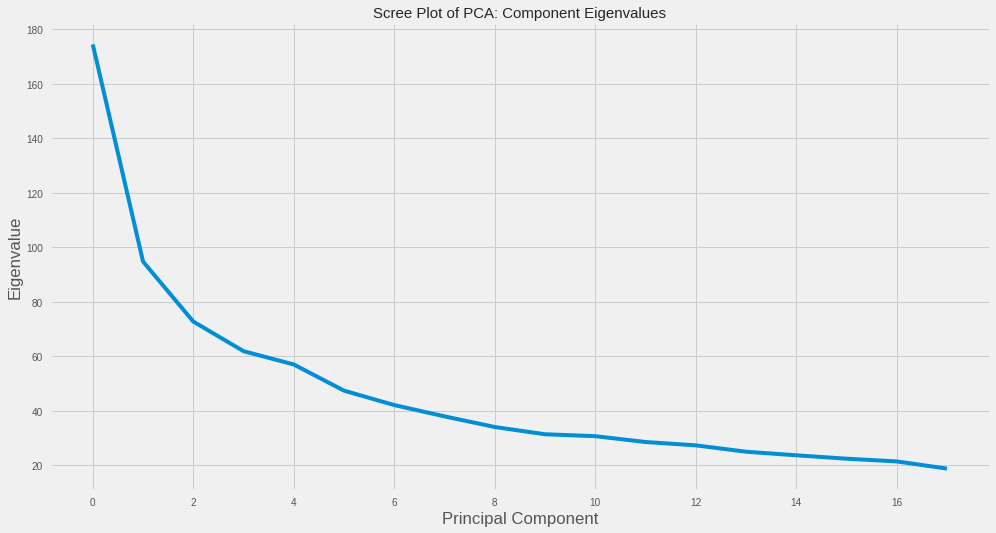

In [68]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator
    plt.style.use("fivethirtyeight")
    ax = figure(figsize=(15,8)).gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree Plot of PCA: Component Eigenvalues',fontsize=15)
    show()
scree_plot()

### Explained variance plot

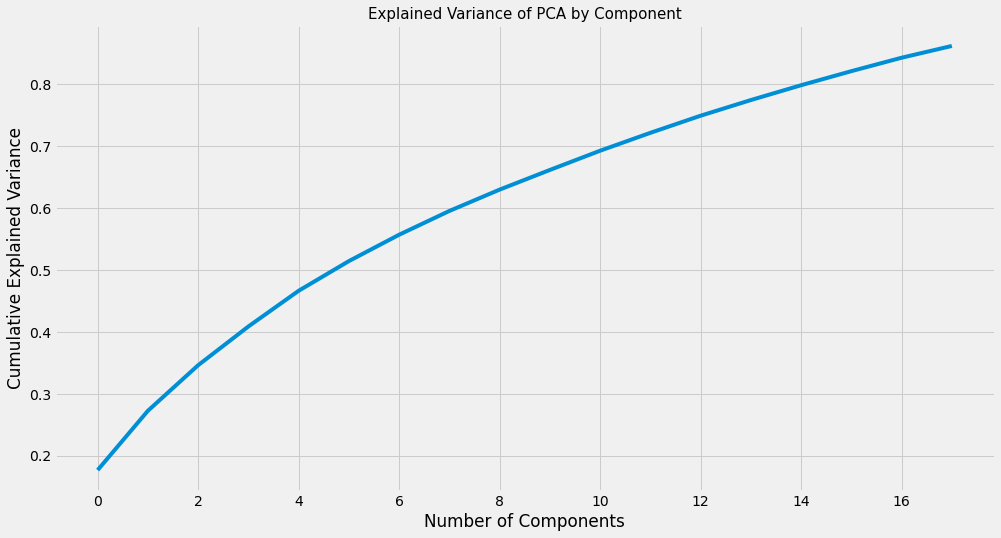

In [19]:
def var_explained():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator
    ax = figure(figsize=(15,8)).gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    #plt.axvline(x=16, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component',fontsize=15)
    show()
var_explained()

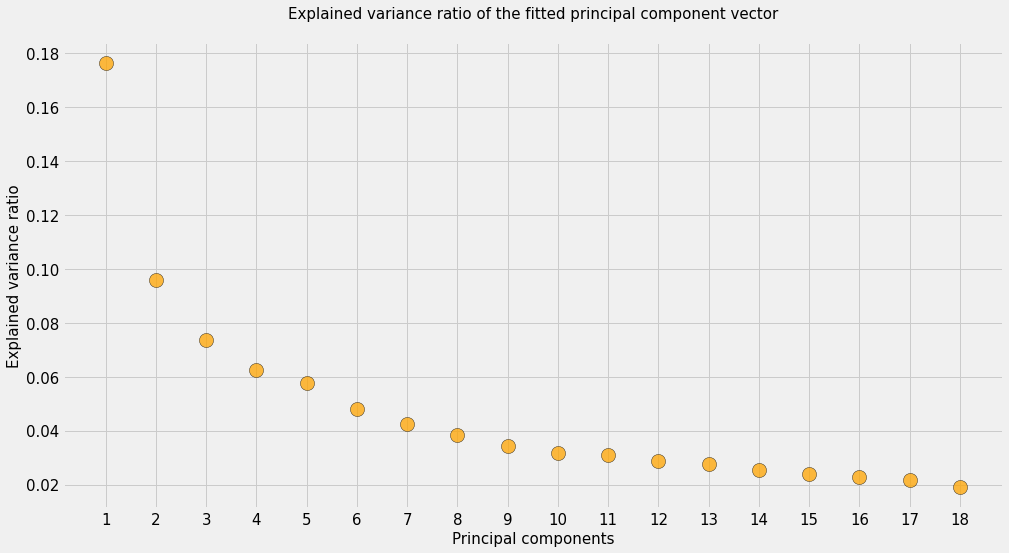

In [21]:
plt.figure(figsize=(15,8))
plt.style.use("fivethirtyeight")
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the fitted principal component vector\n",fontsize=15)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the $1^{st}$ principal component explains about 17% of the total variance in the data and the $2^{nd}$ component explians further 9%. Therefore, if we just consider first two components, they together explain 26% of the total variance.

In [22]:
pca.explained_variance_ratio_

array([0.17645484, 0.09589032, 0.0736158 , 0.06262475, 0.05768571,
       0.04797542, 0.0426224 , 0.0384265 , 0.0344777 , 0.0317843 ,
       0.03107919, 0.0289129 , 0.02767036, 0.02531068, 0.0239808 ,
       0.02271721, 0.02170671, 0.01904506])

In [23]:
principal_df = pd.DataFrame(data = principal_components, \
                            columns = ['PC_1', 'PC_2','PC_3','PC_4','PC_5','PC_6','PC_7','PC_8','PC_9','PC_10','PC_11',\
                                       'PC_12','PC_13','PC_14','PC_15','PC_16','PC_17','PC_18'])
principal_df.head()                     

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18
0,4.995395,-7.425698,8.683960,-1.922282,29.272275,-18.192002,17.160671,9.221948,7.671647,-0.108747,4.242482,2.938789,0.455130,-1.533934,-3.883985,-2.151317,-1.224011,0.450192
1,8.467338,4.329506,2.279342,3.613092,15.599035,3.920674,-16.314548,3.059935,-15.069945,-8.343328,-10.928080,0.387162,8.463079,-2.785469,-13.811339,-2.048498,-2.790802,-0.866921
2,22.594074,21.938100,20.178302,-5.963092,1.956863,26.887662,16.468662,2.213261,0.128075,2.342689,-3.517922,0.852863,-1.135021,-0.437174,0.512496,-0.670922,-0.987327,0.702693
3,-7.990884,-5.874095,1.595057,-4.087616,2.386668,-0.305233,0.299619,-0.844654,-1.554913,-0.890078,-2.219431,-1.941720,-0.667358,0.831932,2.887426,-0.070295,0.458195,-0.977043
4,-3.350635,-3.338749,-0.536127,-2.369231,-0.251329,1.235864,-0.200606,-0.299573,-2.743510,-0.902031,4.301407,0.049585,-0.865117,-1.139683,-0.039024,1.240135,-0.853694,0.745814


### Optimal Number of Prncipal component with Cumulative Explained variance gr. than 80

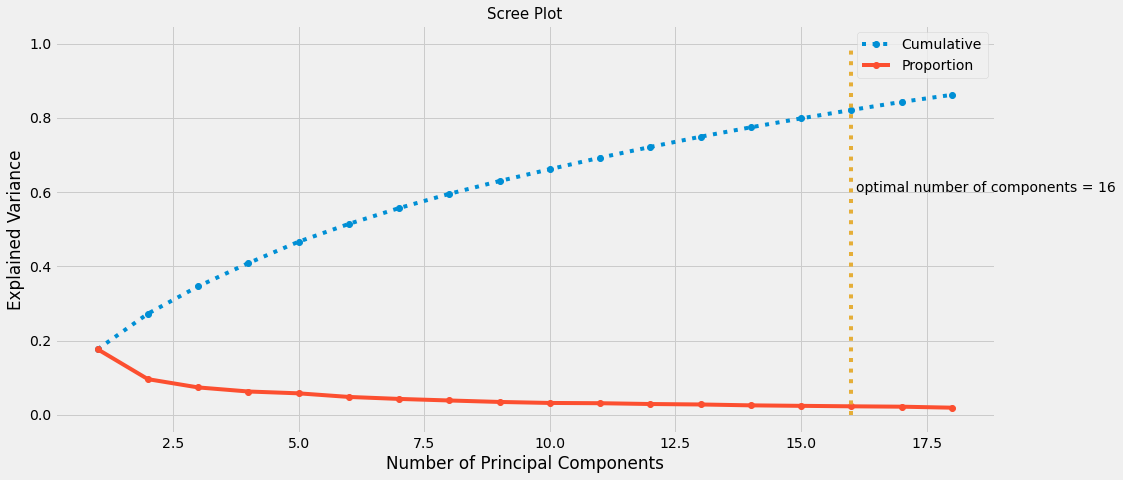

In [26]:
plt.figure(figsize=(15,7))
plt.style.use("fivethirtyeight")
plt.plot(range(1,19), np.cumsum(pca.explained_variance_ratio_), linestyle=":", marker='o', label='Cumulative')
plt.plot(range(1,19), pca.explained_variance_ratio_, marker='o', label='Proportion')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot",fontsize=15)
plt.plot([16]*10, np.linspace(0,1,10), ":")
plt.text(16.1, 0.6, "optimal number of components = 16")
plt.legend(loc='best')
plt.show()

### Pre-Analysisng the Clusters and Scores by Visualization

In [27]:
from sklearn.metrics import silhouette_score
sse_=[]
for k in range(2,20):
    kmeans=KMeans(n_clusters=k).fit(scale_fit_transform)
    sse_.append([k,silhouette_score(scale_fit_transform,kmeans.labels_)])

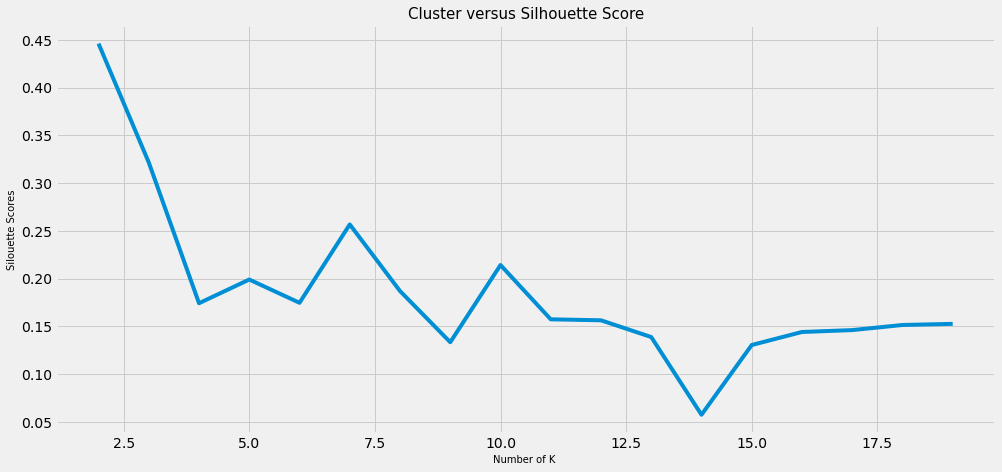

In [28]:
plt.figure(figsize=(15,7))
plt.xlabel("Number of K ",fontsize=10)
plt.ylabel("Silouette Scores",fontsize=10)
plt.title("Cluster versus Silhouette Score",fontsize=15)
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])
plt.show()

In [29]:
ssq = []
for K in range(1,20):
    kmeans_model = KMeans(n_clusters=K, random_state=123)
    kmeans_model.fit(scale_fit_transform)
    ssq.append(kmeans_model.inertia_)

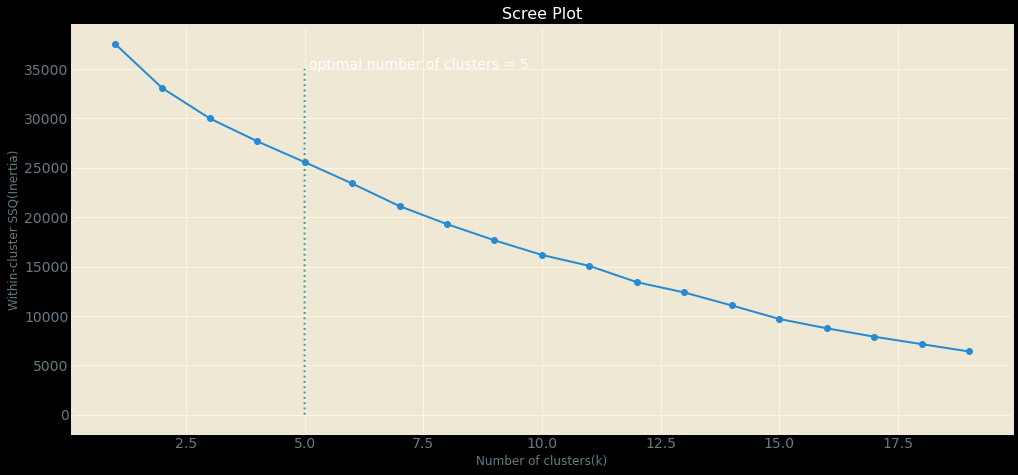

In [32]:
plt.figure(figsize=(15,7))
plt.style.use("Solarize_Light2")
plt.plot(range(1,20), ssq, marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("Within-cluster SSQ(Inertia)")
plt.title("Scree Plot")
plt.plot([5]*35000, range(1,35001), ":")
plt.text(5.1, 35000, "optimal number of clusters = 5")
plt.show()

**The scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – silhouette and calinski_harabasz. The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters.**

**The KElbowVisualizer also displays the amount of time to train the clustering model per K as a dashed green line, but is can be hidden by setting timings=False. In the following example, we’ll use the calinski_harabasz score and hide the time to fit the model.**

In [33]:
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer

In [34]:
# for i, exp_var in enumerate(exp_var_ratio.cumsum()):
#     if exp_var >= 0.9:
#         n_comps = i + 1
#         break
# print("Number of components:", n_comps)
# pca = PCA(n_components=n_comps)
# pca.fit(X)
# scores_pca = pca.transform(X)

In [35]:
model=KMeans()

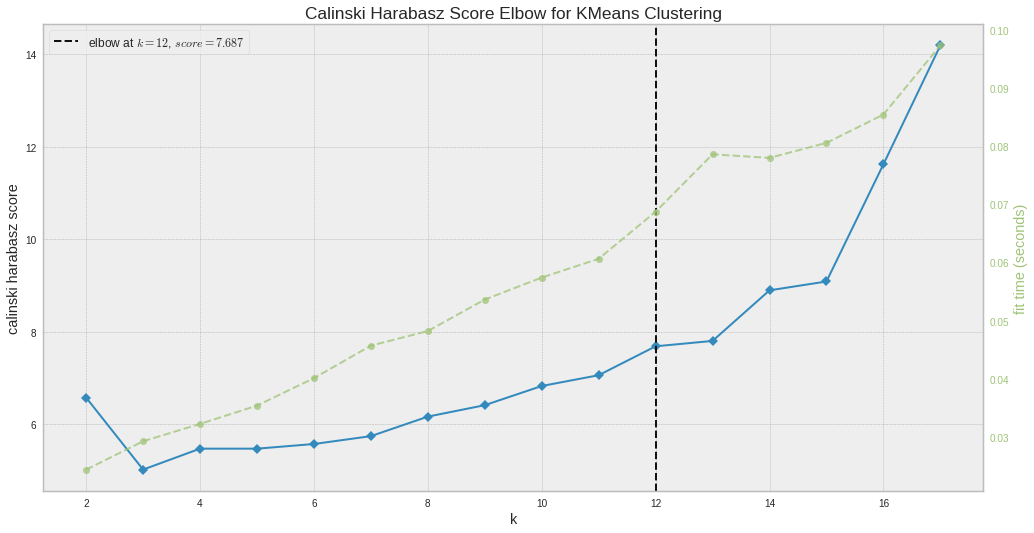

In [37]:
plt.figure(figsize=(15,8))
plt.style.use("bmh")
for i in range(2,18):
    labels=cluster.KMeans(n_clusters=i,random_state=123).fit(principal_df).labels_
visualizer = KElbowVisualizer(model, k=(2,18), metric='calinski_harabasz', timings=True)
visualizer.fit(principal_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**By default, the parameter locate_elbow is set to True, which automatically find the “elbow” which likely corresponds to the optimal value of k using the “knee point detection algorithm”.**

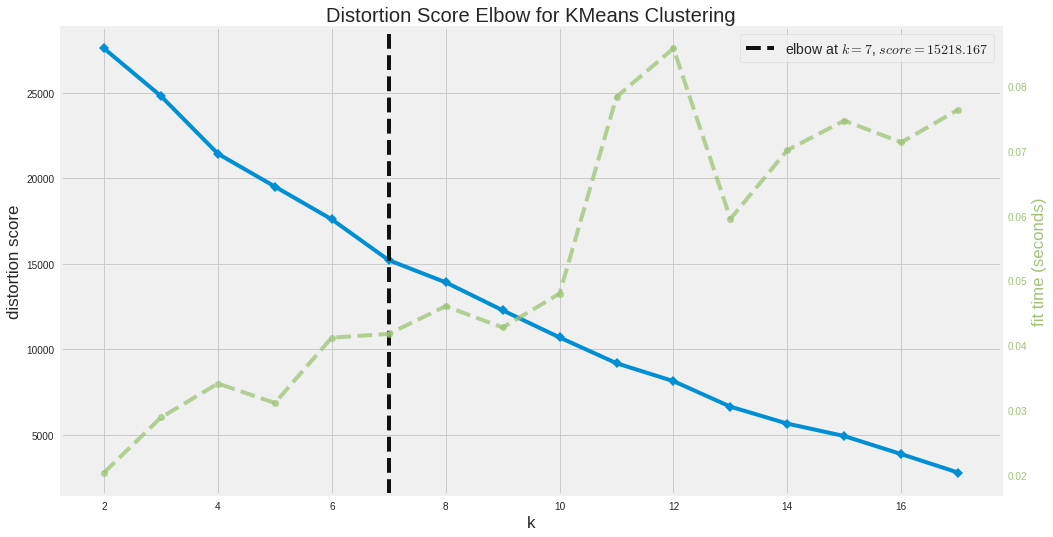

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6df8b7f650>,
                 k=None, model=None)

In [38]:
plt.figure(figsize=(15,8))
plt.style.use("fivethirtyeight")
for i in range(2,18):
    labels=cluster.KMeans(n_clusters=i,random_state=123).fit(principal_df).labels_
kelbow_visualizer(KMeans(random_state=4), principal_df, k=(2,18))
    #print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(principal_df,labels,metric="euclidean",random_state=200)))

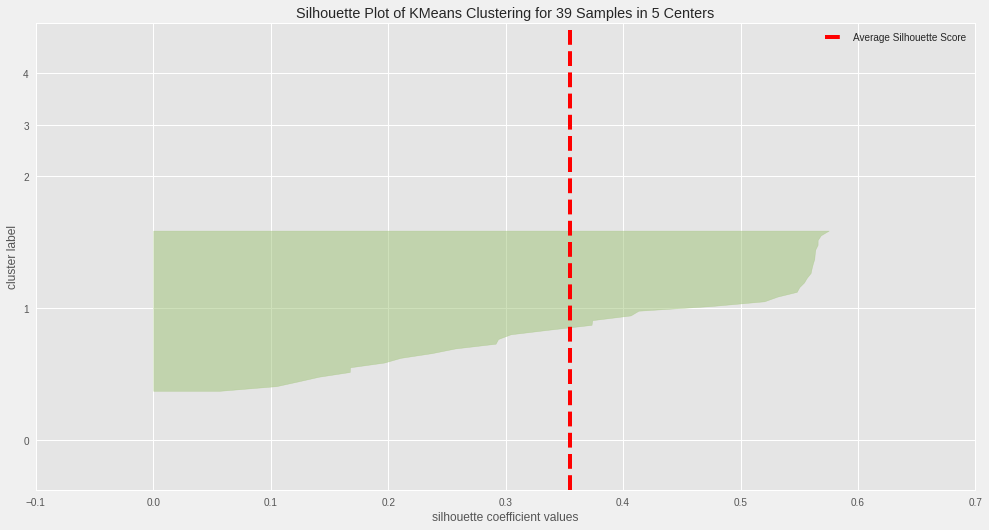

In [39]:
#silhouette_visualizer(KMeans(5, random_state=42), principal_df, colors='yellowbrick')
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(principal_df)        # Fit the data to the visualizer
visualizer.show()   
#silhouette_visualizer(KMeans(5, random_state=42), principal_df, colors='yellowbrick')

#### Fitting the components

In [40]:
km = KMeans(n_clusters=5, random_state=123)
km.fit(principal_df)

KMeans(n_clusters=5, random_state=123)

#### Predicting the Companies Cluster

In [41]:
predicted_cluster = km.predict(principal_df)

In [42]:
predicted_cluster

array([0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [43]:
principal_df['category'] = pd.Series(predicted_cluster, index=companies.index)
companies.index.name = "Company Number"

In [44]:
df = pd.DataFrame({'labels':predicted_cluster,'companies':Company_Name})
df.sort_values('labels').head()

,labels,companies
Company Number,,
0,0,AIG
21,0,Microsoft
22,0,Mitsubishi
24,0,Pepsi
25,0,Pfizer


### Agglomerative Clustering

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
```
- single
- complete
- average
- weighted
- centroid
```

In [45]:
import pylab
import scipy.cluster.hierarchy
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import set_link_color_palette
from sklearn.cluster import AgglomerativeClustering

In [46]:
set_link_color_palette(['yellow'])
link = linkage(principal_df, method='ward', metric='euclidean')

In [47]:
principal_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,category
0,4.995395,-7.425698,8.683960,-1.922282,29.272275,-18.192002,17.160671,9.221948,7.671647,-0.108747,4.242482,2.938789,0.455130,-1.533934,-3.883985,-2.151317,-1.224011,0.450192,0
1,8.467338,4.329506,2.279342,3.613092,15.599035,3.920674,-16.314548,3.059935,-15.069945,-8.343328,-10.928080,0.387162,8.463079,-2.785469,-13.811339,-2.048498,-2.790802,-0.866921,0
2,22.594074,21.938100,20.178302,-5.963092,1.956863,26.887662,16.468662,2.213261,0.128075,2.342689,-3.517922,0.852863,-1.135021,-0.437174,0.512496,-0.670922,-0.987327,0.702693,3
3,-7.990884,-5.874095,1.595057,-4.087616,2.386668,-0.305233,0.299619,-0.844654,-1.554913,-0.890078,-2.219431,-1.941720,-0.667358,0.831932,2.887426,-0.070295,0.458195,-0.977043,0
4,-3.350635,-3.338749,-0.536127,-2.369231,-0.251329,1.235864,-0.200606,-0.299573,-2.743510,-0.902031,4.301407,0.049585,-0.865117,-1.139683,-0.039024,1.240135,-0.853694,0.745814,0


### Dendrogram

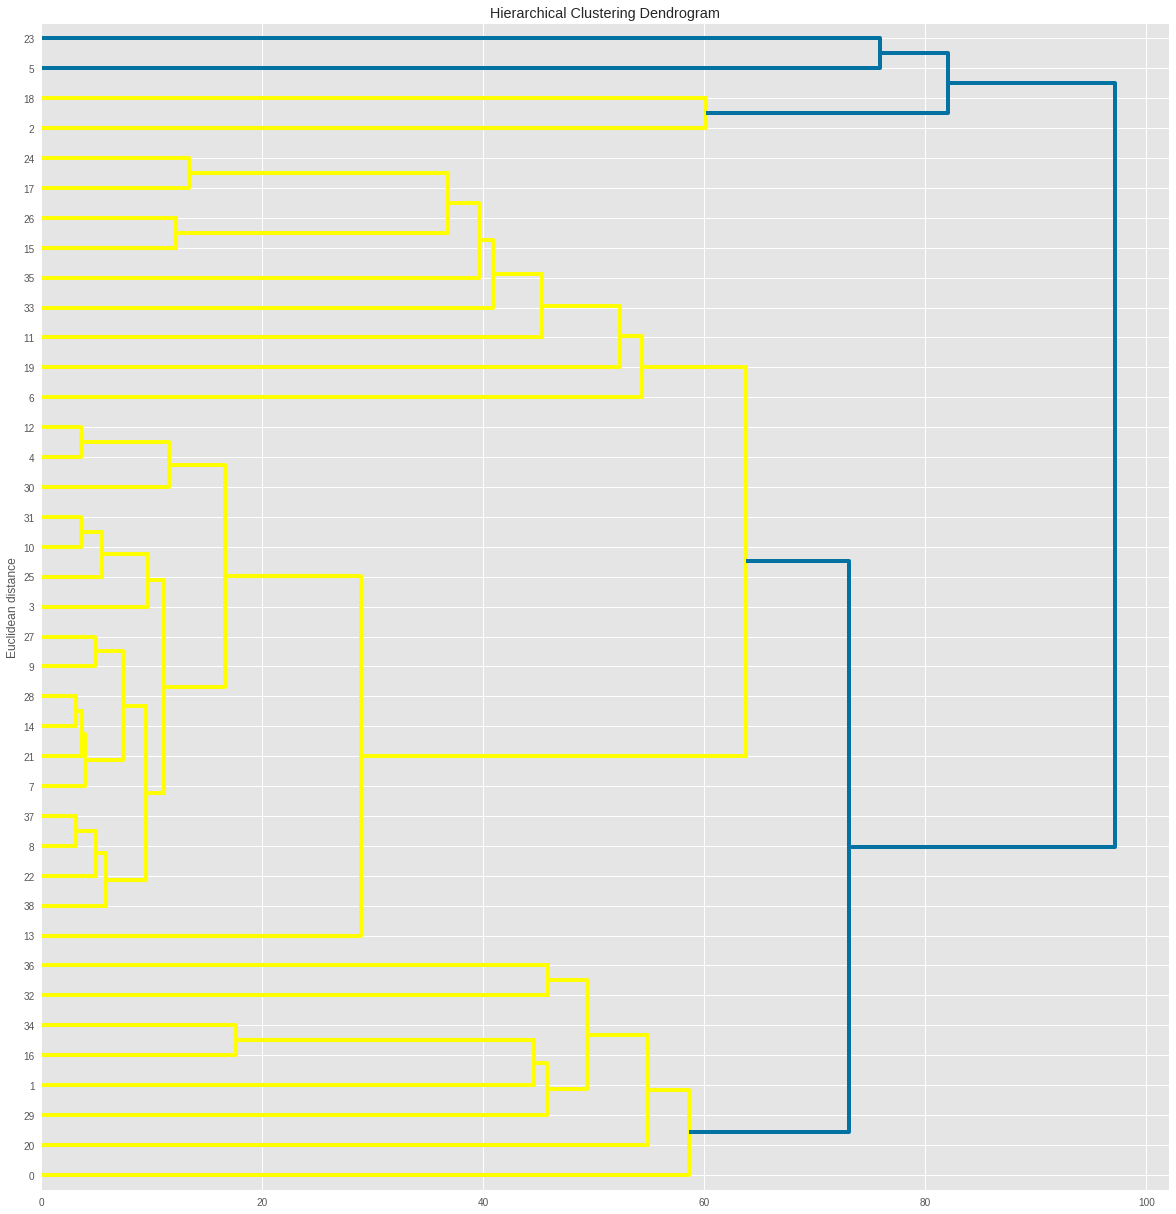

In [48]:
fig = pylab.figure(figsize=(18,20))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel("Euclidean distance")

dendrogram(link,
           leaf_rotation=0,  # rotates the x axis labels
           leaf_font_size=10,
          orientation = 'right')  # font size for the x axis labels
plt.show()

The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

-   Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
-   Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
-   Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [49]:
model = AgglomerativeClustering(n_clusters=16,linkage = 'complete')

In [50]:
model.fit(principal_df)

AgglomerativeClustering(linkage='complete', n_clusters=16)

In [51]:
predicted_cluster2 =  model.labels_

In [52]:
silhouette_score(principal_df, model.labels_)

0.28958350259068605

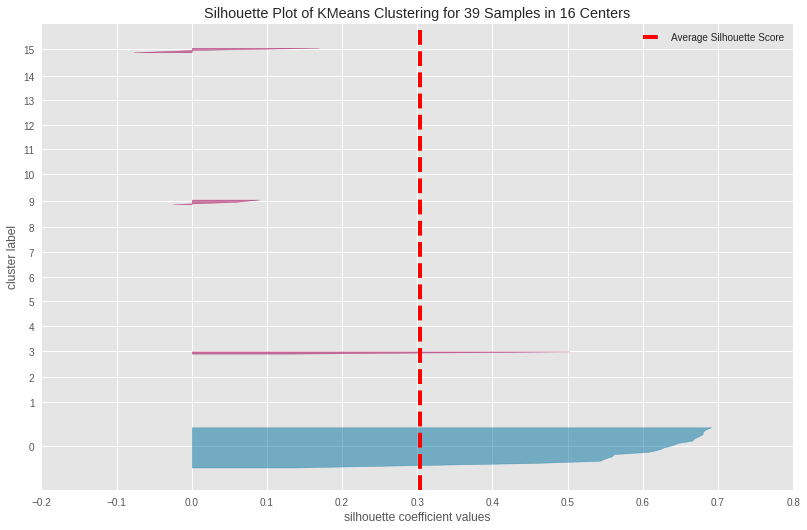

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6df8095b50>,
                     colors='yellowbrick', model=None)

In [53]:
fig = pylab.figure(figsize=(12,8))
silhouette_visualizer(KMeans(16, random_state=42), principal_df, colors='yellowbrick')

In [54]:
reduced_data = PCA(n_components = 3).fit_transform(principal_df)

In [55]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

In [56]:
# create DataFrame aligning labels & companies
df2 = pd.DataFrame({'labels': labels, 'companies': Company_Name})

In [57]:
df2.head()

,labels,companies
Company Number,,
0,7,AIG
1,9,American express
2,10,Boeing
3,6,Bank of America
4,12,Canon


In [58]:
df1=pd.DataFrame(reduced_data)

In [59]:
df1=pd.concat([df2,df1],axis=1)

In [60]:
df1=df1.set_axis(["labels","companies","PC_1","PC_2","PC_3"],axis=1, inplace=False)
df1

,labels,companies,PC_1,PC_2,PC_3
0,7,AIG,4.968957,-7.433527,8.574086
1,9,American express,8.445634,4.258872,2.060439
2,10,Boeing,22.746284,22.074907,20.079465
3,6,Bank of America,-8.000744,-5.840920,1.672428
4,12,Canon,-3.362647,-3.333705,-0.491951
5,2,Caterpillar,56.792895,-12.241490,-22.999328
6,5,Colgate-Palmolive,-2.187775,21.938930,-13.837754
7,6,Cisco,-7.731039,-3.790388,0.769067
8,13,Dell,-9.733552,-4.163578,1.183713
9,6,Ford,-7.866403,-5.512351,1.342447


### Intercluster Distance Maps


Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters.

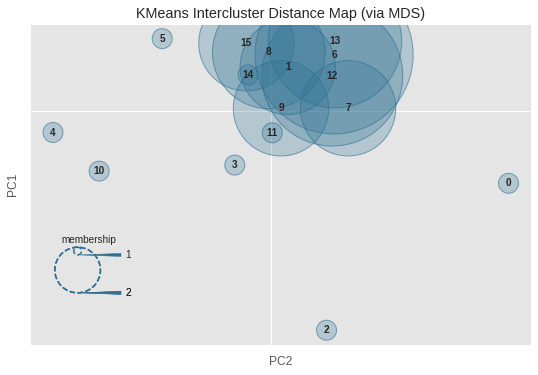

In [61]:
from yellowbrick.cluster import InterclusterDistance
visualizer = InterclusterDistance(kmeans)
visualizer.fit(reduced_data)        # Fit the data to the visualizer
visualizer.show() 

In [62]:
# Scatter plot on Principal components to visualize the spread of the data
x=int(input("Enter the Cluster value :"))
df1[df1['labels']==x]

Enter the Cluster value :5


,labels,companies,PC_1,PC_2,PC_3
6,5,Colgate-Palmolive,-2.187775,21.93893,-13.837754


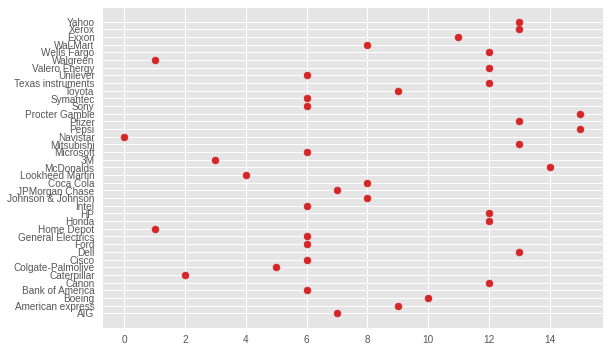

In [63]:
plt.scatter(x=df2['labels'], y=df2['companies'], c='#d62728')

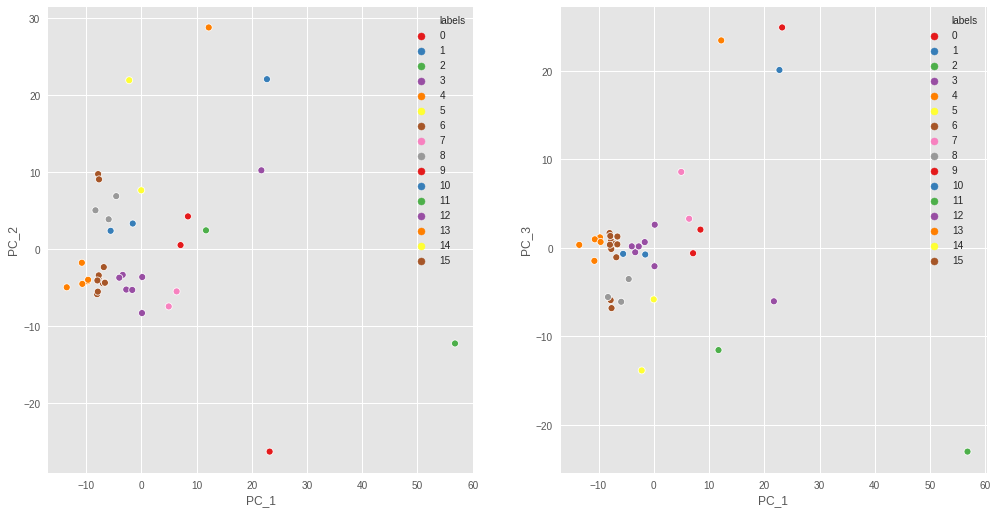

In [64]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='PC_1',y='PC_2',hue='labels',legend='full',palette="Set1",data=df1,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='labels',legend='full',palette="Set1",data=df1,ax=axes[1])

#### Another important Metrics for measuring the Clustering Score is David Bouldin Score which says lower Davies-Bouldin index relates to a model with better separation between the clusters.Values closer to zero indicate a better partition. 

From the Scores we can see that for Cluster 4 the Scores is closer to zero and So No. of Cluster=4 is best for this model.

Reference: https://esigma6.wordpress.com/2018/11/03/2-3-9-7-davies-bouldin-index/

In [65]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
km_scores= []
km_silhouette = []
db_score = []
for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=0).fit(principal_df)
    preds = km.predict(principal_df)
    print("Score for number of cluster(s) {}: {}".format(i,km.score(principal_df)))
    km_scores.append(-km.score(principal_df))
    silhouette = silhouette_score(principal_df,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    db = davies_bouldin_score(principal_df,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    print("-"*100)

Score for number of cluster(s) 2: -27939.883279248883
Silhouette score for number of cluster(s) 2: 0.42738036411760305
Davies Bouldin score for number of cluster(s) 2: 1.493197768058421
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -24938.460656098912
Silhouette score for number of cluster(s) 3: 0.3564073796805817
Davies Bouldin score for number of cluster(s) 3: 1.6732198473333841
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -22885.217325847592
Silhouette score for number of cluster(s) 4: 0.35398753673755406
Davies Bouldin score for number of cluster(s) 4: 1.4459613505319895
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -20391.1664567558
Silhouette score for number of cluster(s) 5: 0.30092982546987557
Davies Bouldin score 

**Limitations:**
k-means algorithm will often be ineffective if the clusters have complicated geometries. In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries.

Simplicity of k-means is a big advantage for fast processing of large scale data. But this very simplicity also leads to practical challenges in its application.

In particular, the non-probabilistic nature of k-means and its use of simple distance-from-cluster-center to assign cluster membership leads to poor performance for many real-world situations.

Gaussian mixture models (GMMs), can be viewed as an extension of the ideas behind k-means, but can also be a powerful tool for estimation beyond simple clustering.